## 光线追踪加速

### 1.背景知识简介
这里加速有两种BVH和SAH，我都实现了一下。

简单来说BVH是对求交点的过程进行优化，SAH是对BVH的划分过程进行优化。可以把SAH看做BVH进化版本吧

我们想一下，假设我们有个场景里面物体特别多，那么我们就会有很多的三角形，那么如果我们一个个的与三角形去判定是否可以相交，时间复杂度也就太高了。

于是我们想了一个办法就是----先用包围盒吧三角包起来然后求解与包围盒是否相交相交的话再进入包围盒里面与其三角判断是否相交----其实这个思想是计算机世界很常见的时间复杂度优化思路，就是类似于索引查找吧。

####  α.why?
之前的算法在三角形很多的时候会爆炸

#### β.how?

BVH是这样的，我们从大到小的变出盒子，首先我们用一个大盒子包住整个空间（这像是树的根），然后是我们取一个比较长的轴（为了防止最后构建出来的搜索树是很偏的那种，众所周知平衡树查找效率最好）

好了，现在你脑子里有个树，叶节点是我们的三角形（其实我们也可以让叶节点是几个三角形，这里有个trade-off（多分盒子还是让叶节点更复杂） 不过我没有进行尝试哪个会更好一点，不过一定是有一个平衡点使得时间复杂度最小的hh）

我们从根出发，如果不想交那就return 0（没有打到物体），相交则我们则递归的去看左子树和右子树。递归的终点是我们到达了叶子，这时候我们直接返回与三角形相交导致的颜色。

SAH是另一种划分盒子的办法，试想我们划分时假设初始盒子为A 分为B，C  那么什么时候效率最好呢显然是B∩C=∅时 所以当他俩∩的面积越小我们的BVH加速效果就越好，从这一点出发，SAH提出一种可以在划分的时候更小化两者相交的面积的方法。

具体如下：

首先引入代价函数
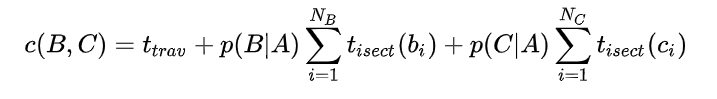

那么C(B,C)就代表我们已知光线与A相交后，我们的代价。  这里有个图形学常用假设---概率与面积成正比

接下来，回忆下BVH是怎么划分的。

首先选择出来最长的轴，然后取前一半obj划分为一个盒子后一半划分为另一个

而现在我们尝试找到更好的划分点。

我们先取一个值x 先设x=10  假设一共n个obj

那么我们取十个间隔

然后分别以i/10*n  (i∈(0,10))来作为划分点我们看一下代价函数最小的点作为我们的分点   -----这里有个有意思的东西就是你怎么划分最佳划分一定以一个物体为分界  ---可以证明不过说起来麻烦就略了。。。。。。

### 2.框架关键点解释

框架没什么好说的...就是比上一次任务多了个BVH而已

### 3.需要自己实现的部分

1.与我们的盒子求交

这里有个有意思的又方便的理解方法，回想下我们盒子的定义是什么----三组对面的交集----那么怎么能说我们的光线进入了盒子呢----光线在三组对面内有所停留----剩下的就是简单的编程实现了

2.BVH加速的求与哪个盒子相交的问题

其实就是简单的二叉树遍历问题流程如下：

if(没相交）return 0//没有交到物体

if(是叶子节点）我们直接把程序的控制权交给与物体相交的部分求出交点出的颜色并返回

if(左子树或者右子树非空）我们就递归与之求交，并且比较哪边交点更近则取哪边

3.SAH

SAH上面说的挺清晰了应该可以了

### 4.一些有价值的问题:

1.上面说到“叶节点是我们的三角形（其实我们也可以让叶节点是几个三角形，这里有个trade-off（多分盒子还是让叶节点更复杂） 不过我没有进行尝试哪个会更好一点，不过一定是有一个平衡点使得时间复杂度最小的hh）” 定性的分析我觉得SAH的平衡点时叶子结点中应该有更多的三角。

2.我们如果把平衡树的算法套到这里会有效果的不过写起来有点麻烦

3.不考虑代价函数，SAH是让相交的点少了，但是他会不会让树长高呢（我觉得特定情况下会的）
